In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_table('fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
df.isnull().sum()

,0
fruit_label,0
fruit_name,0
fruit_subtype,0
mass,0
width,0
height,0
color_score,0


In [ ]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
df['fruit_name'].groupby(df['fruit_name']).count()

,fruit_name
fruit_name,
apple,19
lemon,16
mandarin,5
orange,19


<Axes: xlabel='count', ylabel='fruit_name'>

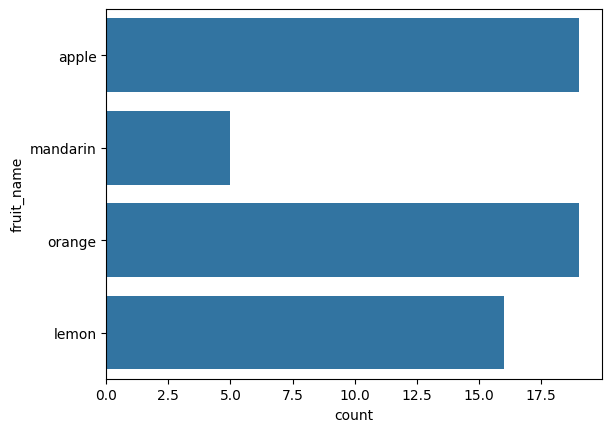

In [ ]:
sns.countplot(df['fruit_name'],label='Count')

<Axes: ylabel='height'>

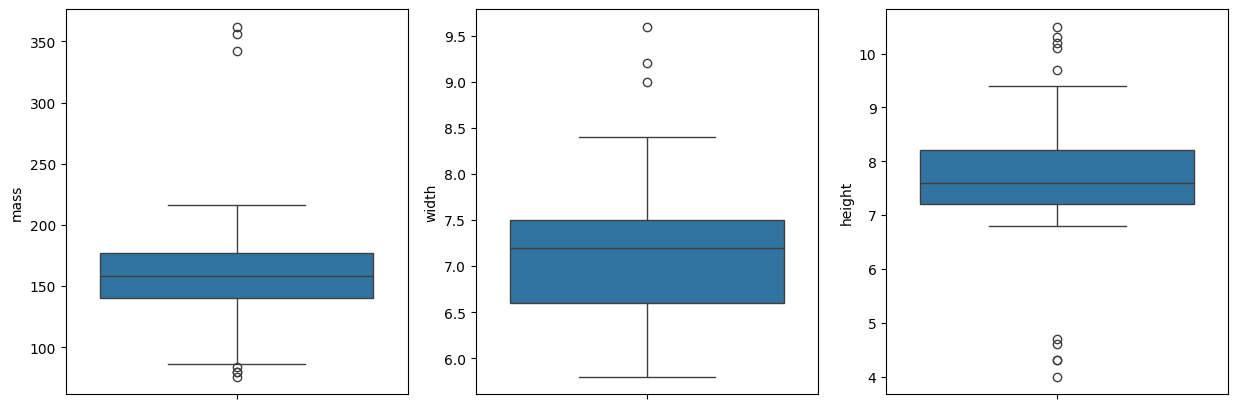

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['mass'],ax=ax[0])
sns.boxplot(df['width'],ax=ax[1])
sns.boxplot(df['height'],ax=ax[2])

In [ ]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

for i in range(2,6):
  knn = KNeighborsClassifier(n_neighbors=i)
  cv_scores = cross_val_score(knn, X, y, cv=5)
  print("Cross-validation scores:", cv_scores)
  print("Mean CV score:", cv_scores.mean())
  print("Standard deviation of CV scores:", cv_scores.std())
  print("-"*50)


Cross-validation scores: [0.5        0.58333333 0.5        0.75       0.54545455]
Mean CV score: 0.5757575757575758
Standard deviation of CV scores: 0.09253594839153013
--------------------------------------------------
Cross-validation scores: [0.33333333 0.75       0.41666667 0.75       0.54545455]
Mean CV score: 0.5590909090909091
Standard deviation of CV scores: 0.1698997705935774
--------------------------------------------------
Cross-validation scores: [0.66666667 0.58333333 0.58333333 0.58333333 0.54545455]
Mean CV score: 0.5924242424242425
Standard deviation of CV scores: 0.039914969310059056
--------------------------------------------------
Cross-validation scores: [0.66666667 0.5        0.5        0.58333333 0.45454545]
Mean CV score: 0.5409090909090909
Standard deviation of CV scores: 0.07539306245227108
--------------------------------------------------


In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

1.0


In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]


In [ ]:
f1_score=f1_score(y_test,y_pred,average='weighted')
print(f1_score)

1.0
